## Overview
This notebook shows EDA on Medium Blog Posts with tag of 'Data Science'

In [1]:
import sys
import os
import json
import numpy as np
import pandas as pd

# my import
sys.path.append('../src/')
from preprocess import MediumBlogPost

import seaborn.apionly as sns
import matplotlib.pyplot as plt
%matplotlib inline

file_name = 'data-science.jl'
file_path = os.path.join(os.environ['DATA_PATH'], 'medium', file_name)

## load data

In [2]:
dfs = []
broadcast_dfs = []
with open(file_path) as f:
    for line in f:
        # get raw data
        row = MediumBlogPost(**json.loads(line)).to_frame()
        dfs.append(row)
        # get df_broadcast
        row_b = pd.DataFrame(MediumBlogPost(**json.loads(line)).to_dict())
        broadcast_dfs.append(row_b)


df = pd.concat(dfs).reset_index(drop=True)
df_broadcast = pd.concat(broadcast_dfs).reset_index(drop=True)

In [3]:
df.tail(2)

,title,publish_time,author,url,author_url,headings,contents,mins_read,claps,lang,tags
8625,Reset – Carissa Yao – Medium,2018-08-24,Carissa Yao,https://medium.com/@carijyao/reset-44c190974b4,https://medium.com/@carijyao,Reset,I t’s my first day running for 3+ miles withou...,5,1,en,"[Running, Challenge, Learning, Injury, Data Sc..."
8626,XML and Scala – Technology@Nineleaps – Medium,2018-08-24,joydeep bhattacharjee,https://medium.com/technology-nineleaps/xml-an...,https://medium.com/@joydeepubuntu,XML and Scala Conquer XML land with Scala,As data scientists and machine learning engine...,6,2,en,"[Spark, Scala, Xml, Data Science, Technology]"


## Basic EDA

### data points

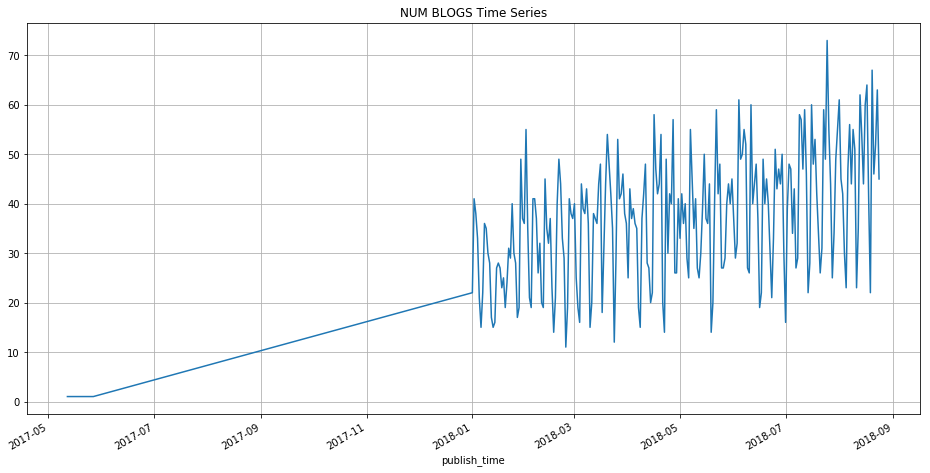

In [4]:
df.groupby('publish_time')['contents'].count().plot(
    figsize=(16, 8),
    title='NUM BLOGS Time Series',
    grid=True
)

### mins read

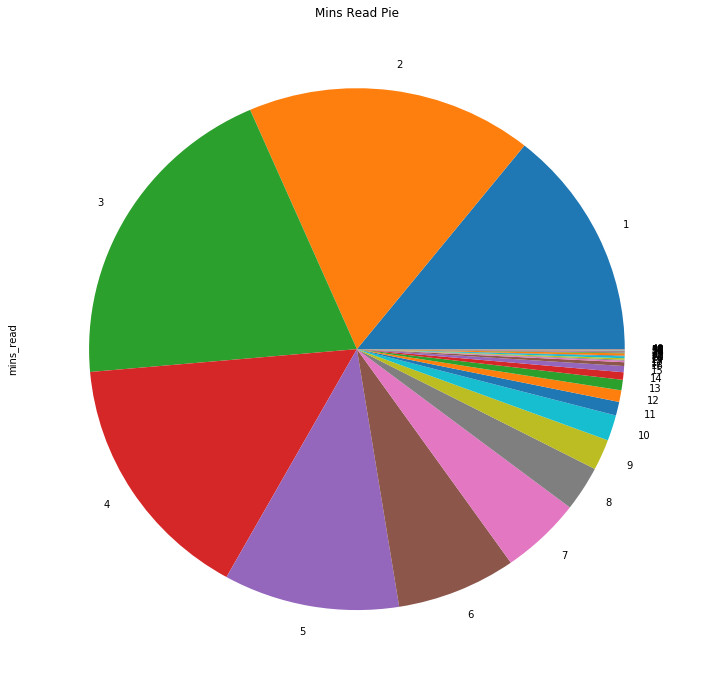

In [5]:
df.groupby('mins_read')['mins_read'] \
    .count() \
    .plot(
        kind='pie',
        figsize=(12, 12),
        fontsize=10,
        title='Mins Read Pie',
)

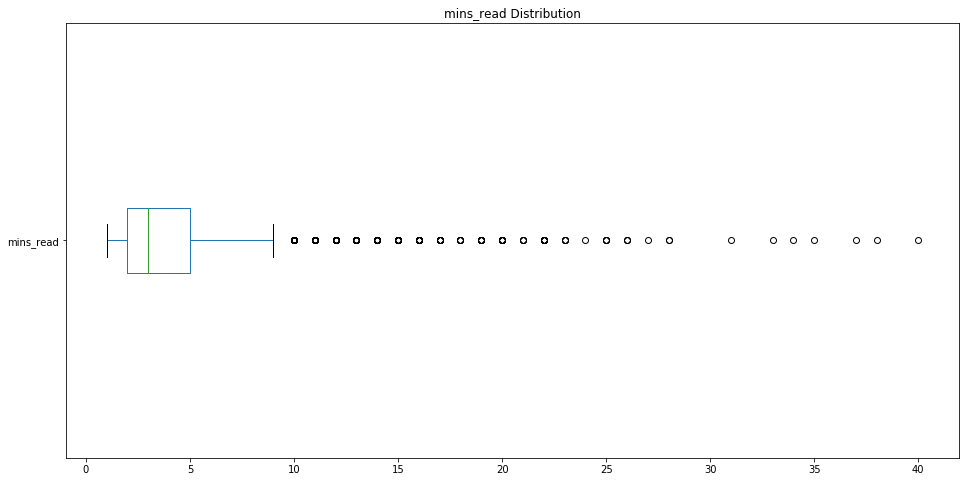

In [8]:
df['mins_read'].plot(
    kind='box',
    figsize=(16, 8),
    title='mins_read Distribution',
    vert=False
)

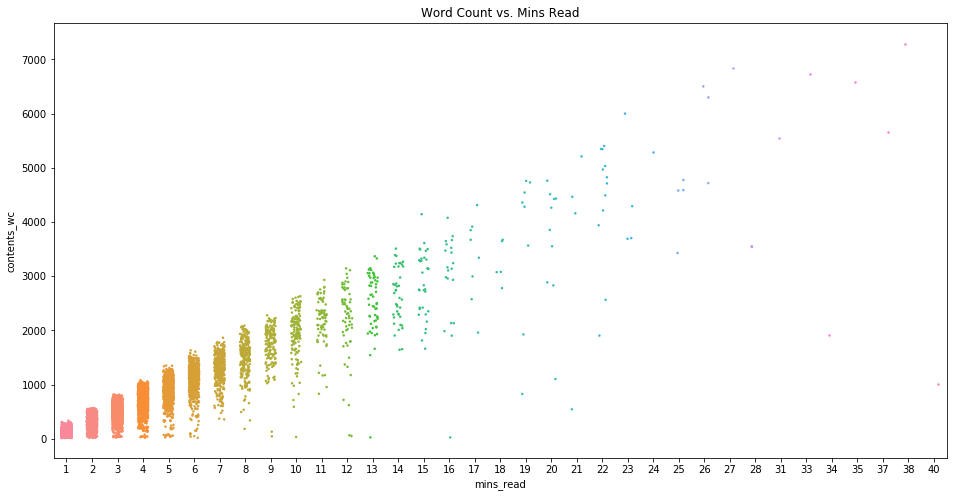

In [9]:
df['contents_wc'] = df.contents.apply(lambda x: len(x.split(' ')))
f, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Word Count vs. Mins Read', fontsize=12)
sns.stripplot(x='mins_read', y='contents_wc', data=df, ax=ax, jitter=0.2, marker='.', size=5)

### tags

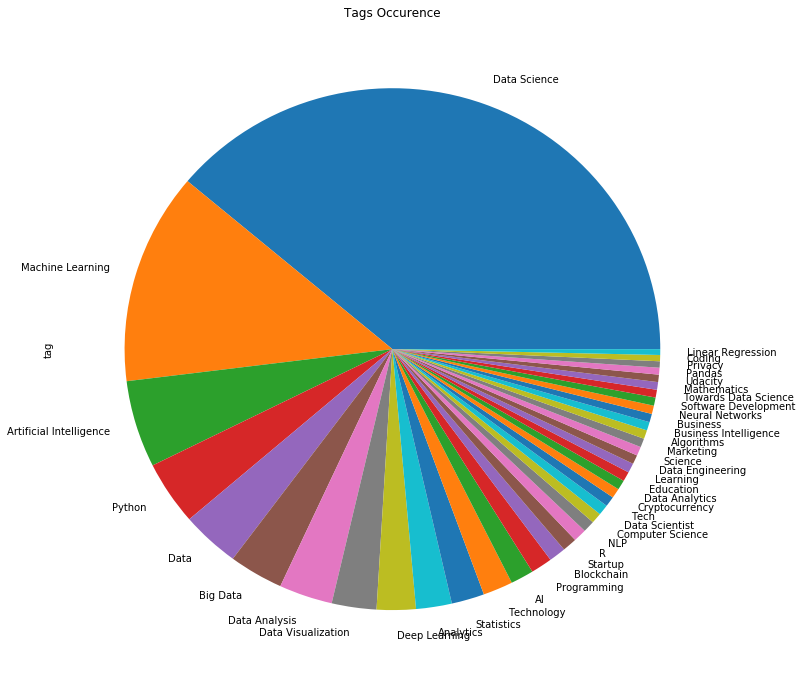

In [10]:
import itertools
tags = list(itertools.chain(*df.tags.values))
pd.DataFrame(tags, columns=['tag'])\
    .groupby('tag')['tag']\
    .count()\
    .sort_values(ascending=False)[:40]\
    .plot(
        kind='pie',
        figsize=(12, 12),
        fontsize=10,
        title='Tags Occurence',
)

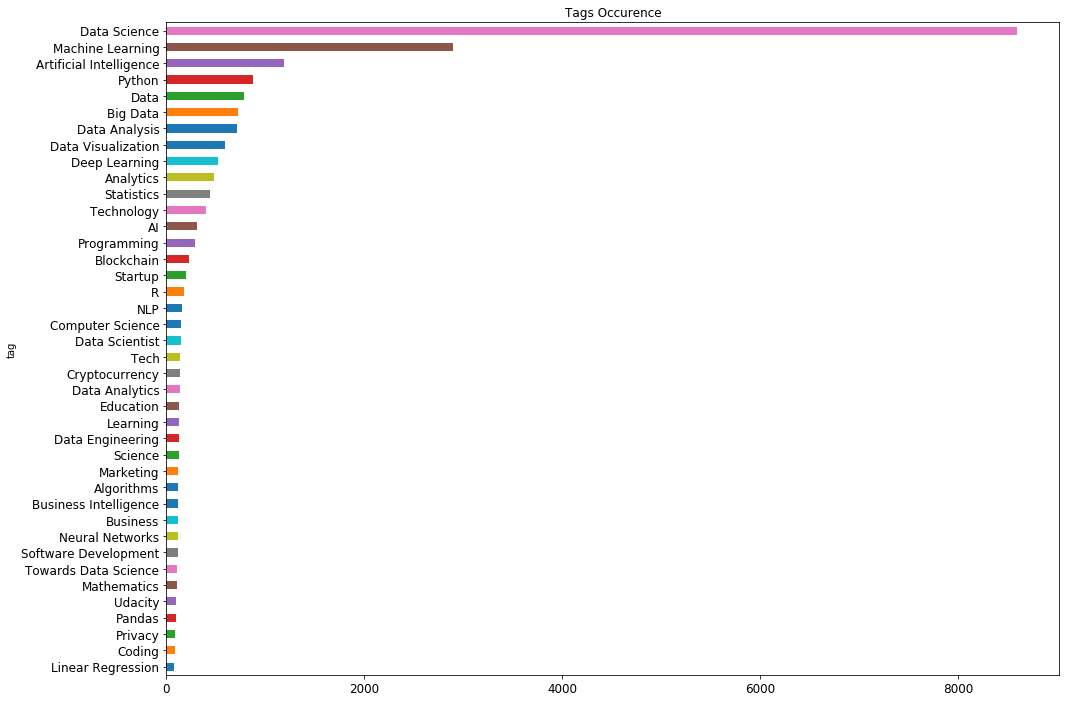

In [11]:
pd.DataFrame(tags, columns=['tag'])\
    .groupby('tag')['tag']\
    .count()\
    .sort_values(ascending=False)[:40][::-1]\
    .plot(
        kind='barh',
        figsize=(16, 12),
        fontsize=12,
        title='Tags Occurence',
)

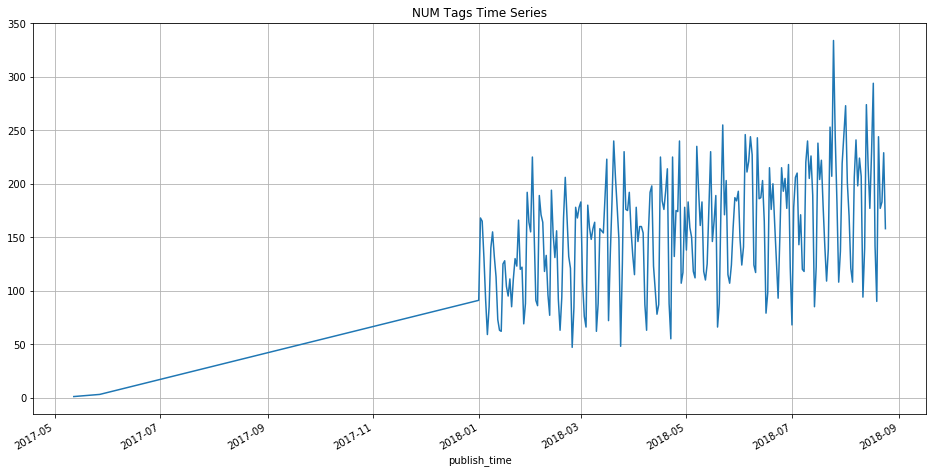

In [12]:
df_broadcast.groupby('publish_time')['tags']\
    .count()\
    .plot(
        figsize=(16, 8),
        title='NUM Tags Time Series',
        grid=True
)

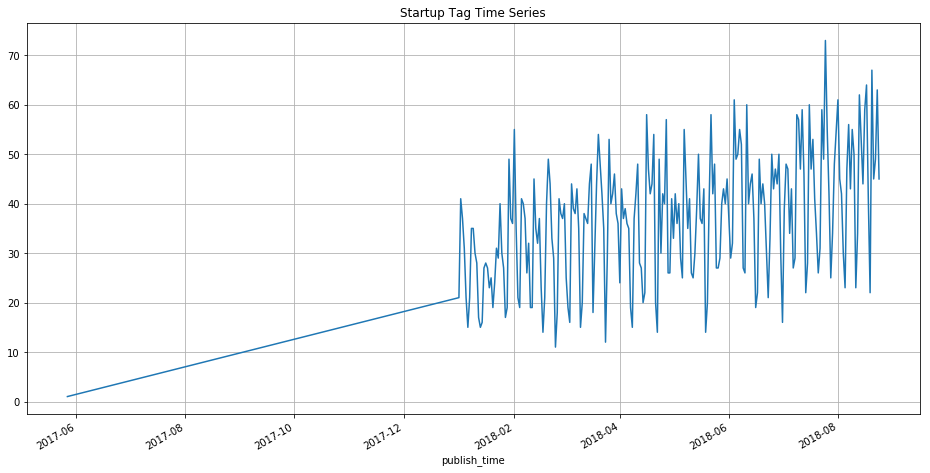

In [13]:
df_broadcast.query('tags=="Data Science"').groupby('publish_time')['tags']\
    .count()\
    .plot(
        figsize=(16, 8),
        title='Startup Tag Time Series',
        grid=True
)

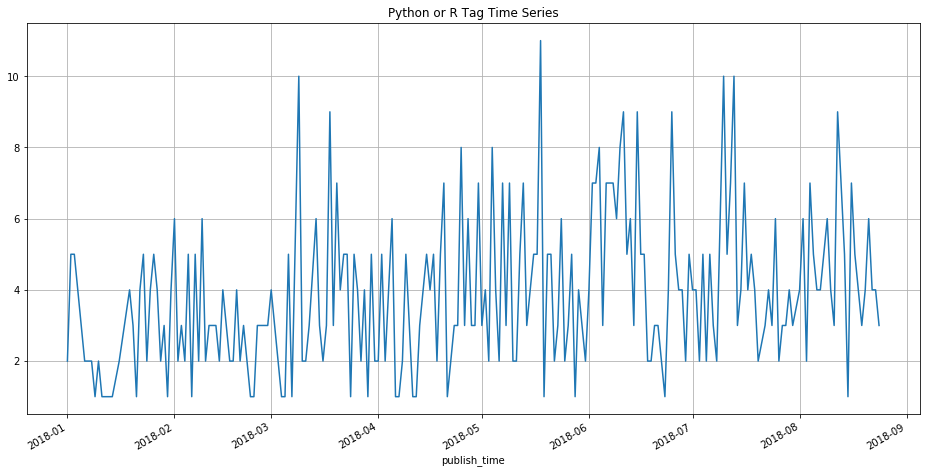

In [15]:
df_broadcast.query('tags=="Python"' or 'tags=="R"').groupby('publish_time')['tags']\
    .count()\
    .plot(
        figsize=(16, 8),
        title='Python or R Tag Time Series',
        grid=True
)

### author

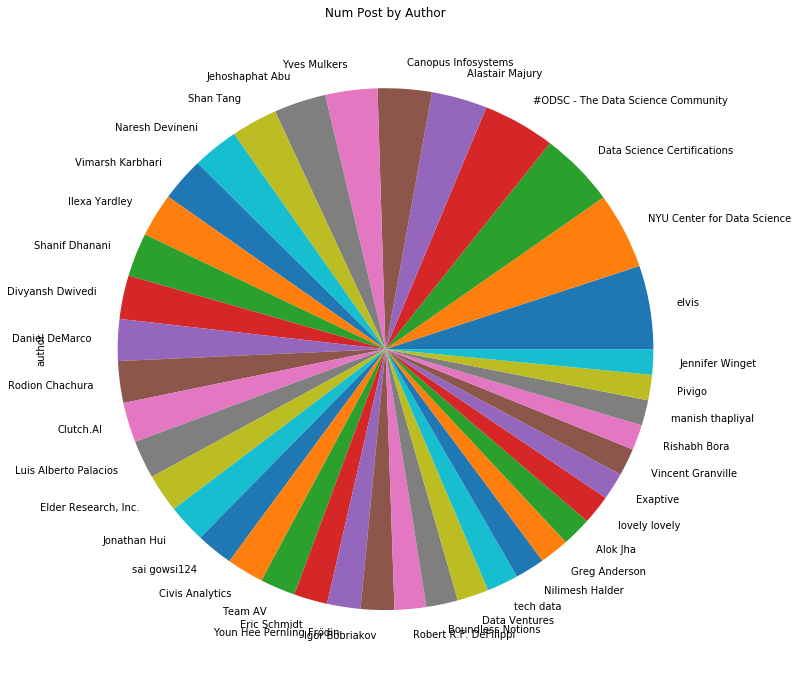

In [16]:
df.groupby('author')['author']\
    .count()\
    .sort_values(ascending=False)[:40]\
    .plot(
        kind='pie',
        figsize=(12, 12),
        fontsize=10,
        title='Num Post by Author',
)

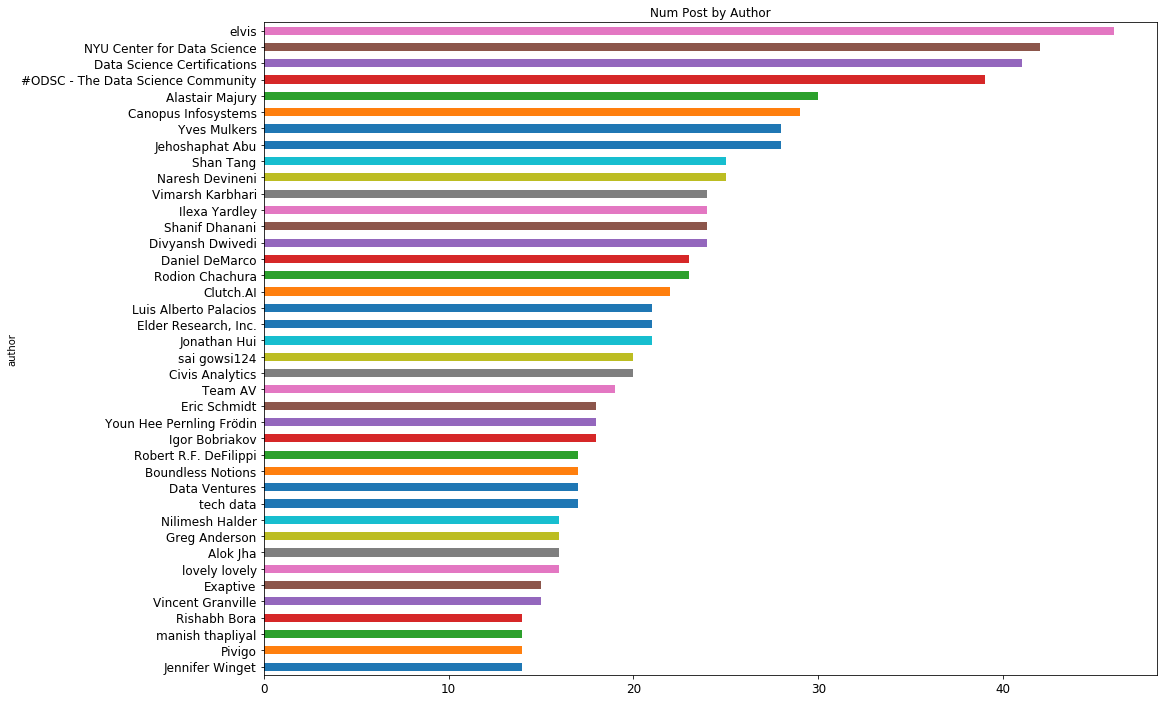

In [17]:
df.groupby('author')['author']\
    .count()\
    .sort_values(ascending=False)[:40][::-1]\
    .plot(
        kind='barh',
        figsize=(16, 12),
        fontsize=12,
        title='Num Post by Author',
)

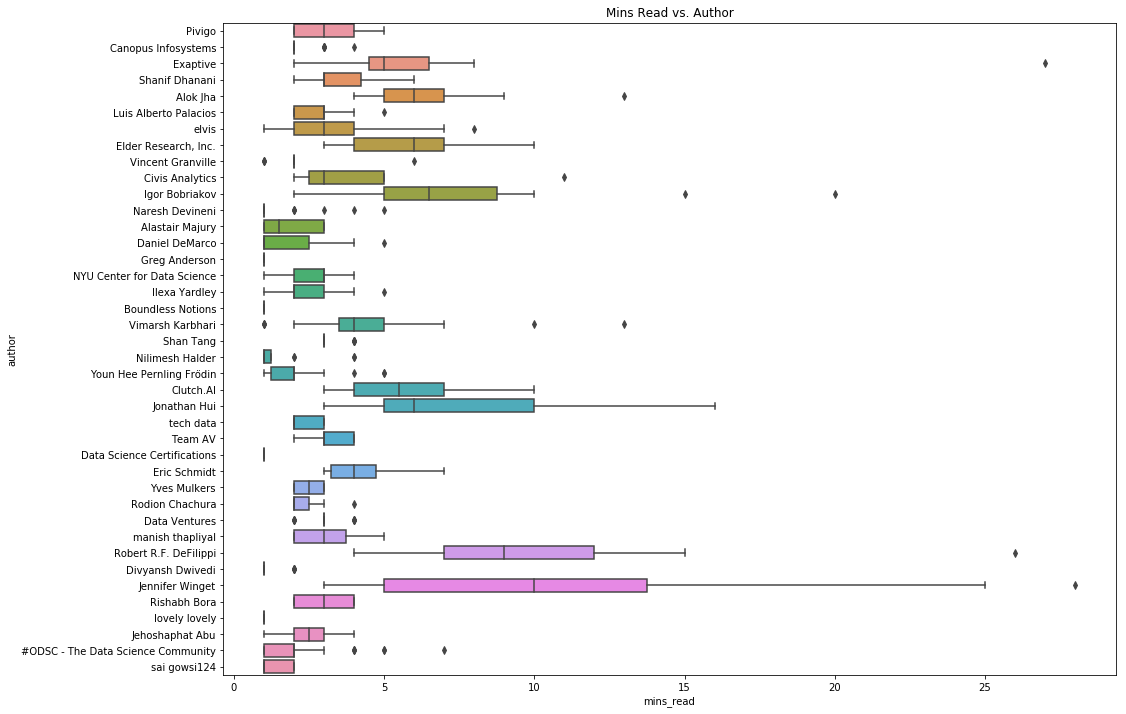

In [18]:
high_vol_author = df.groupby('author')['author']\
    .count()\
    .sort_values(ascending=False)[:40]\
    .index.values

high_vol_author_filter = df.author.isin(high_vol_author)

data = df[high_vol_author_filter.values]
data = data[data.claps < 1000]
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Mins Read vs. Author', fontsize=12)
sns.boxplot(x='mins_read', y='author', data=data, ax=ax, hue_order='claps')

### claps analysis

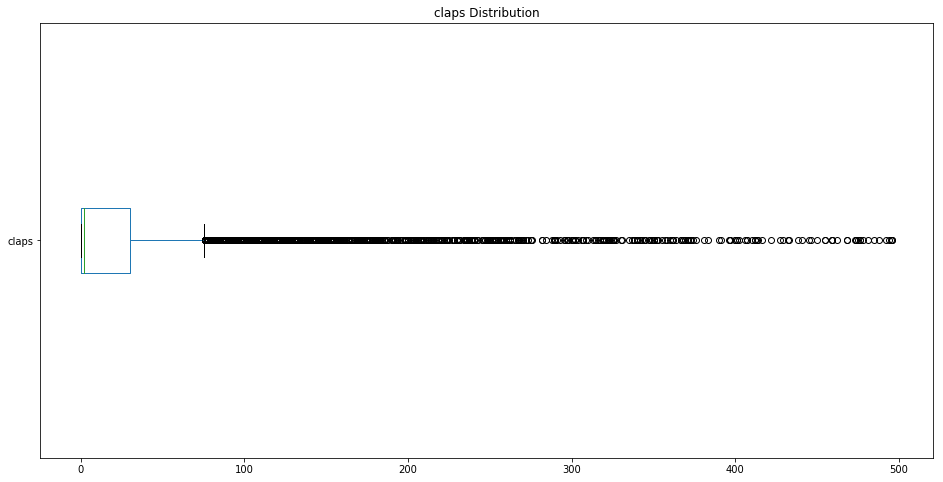

In [19]:
df[df.claps < 5e2]['claps'].plot(
    kind='box',
    figsize=(16, 8),
    title='claps Distribution',
    vert=False
)

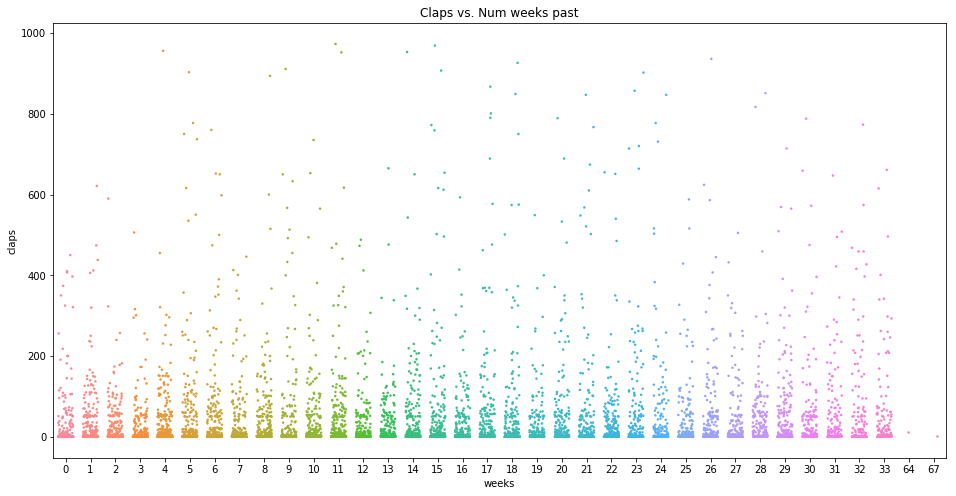

In [20]:
df['weeks'] = df.publish_time.apply(lambda x: int((df.publish_time.iloc[-1] - x) / np.timedelta64(1, 'W')))

data = df[df.claps < 1000]
f, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Claps vs. Num weeks past', fontsize=12)
sns.stripplot(x='weeks', y='claps', data=data, ax=ax, jitter=0.3, marker='.', size=5)

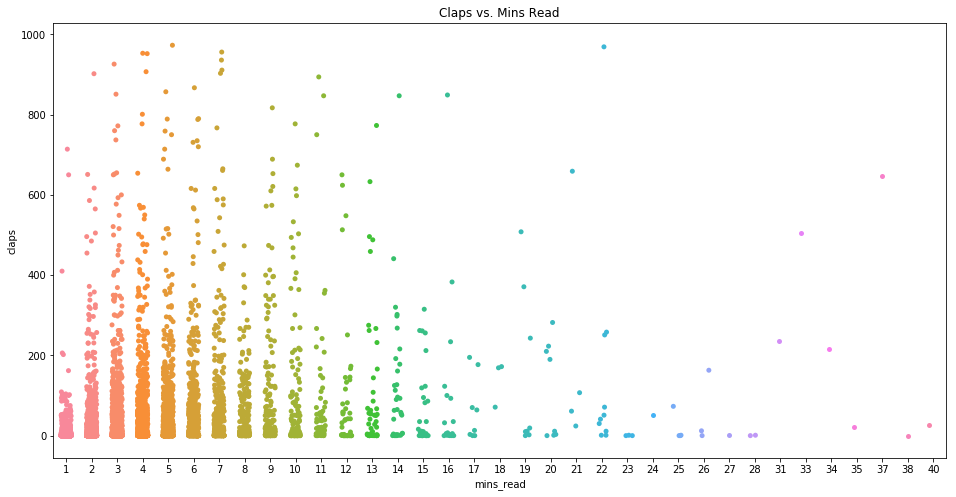

In [21]:
data = df[df.claps < 1000]
f, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Claps vs. Mins Read', fontsize=12)
sns.stripplot(x='mins_read', y='claps', data=data, ax=ax, jitter=0.2)

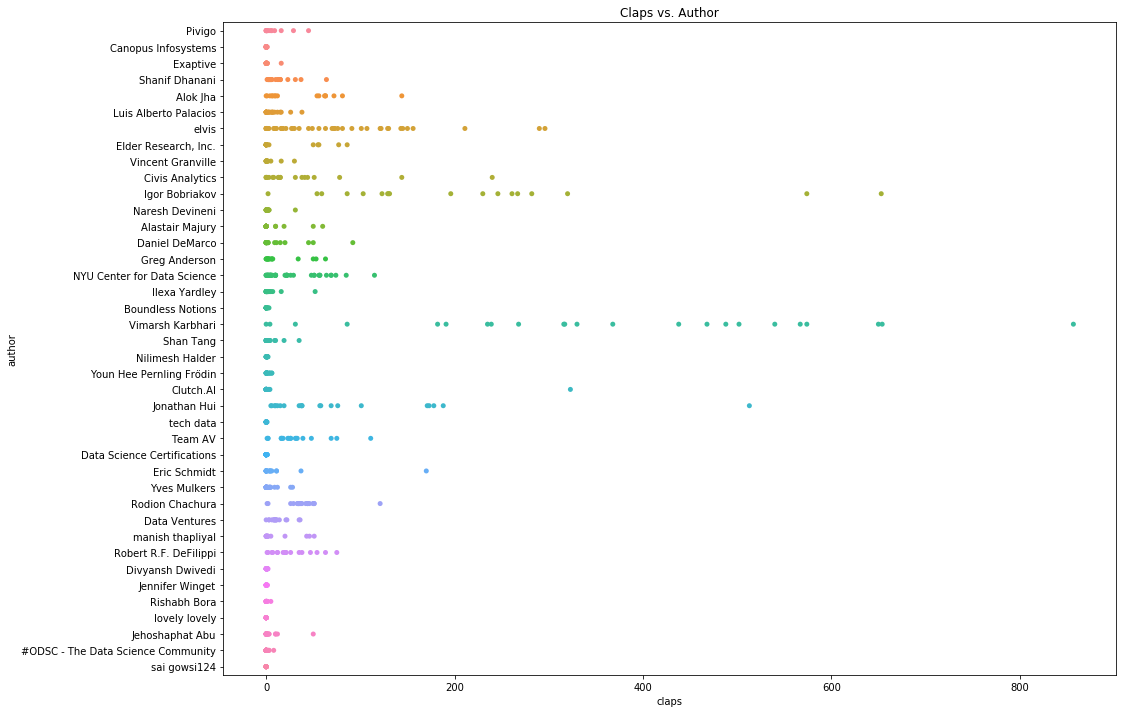

In [22]:
high_vol_author = df.groupby('author')['author'] \
    .count() \
    .sort_values(ascending=False)[:40] \
    .index.values

high_vol_author_filter = df.author.isin(high_vol_author)

data = df[high_vol_author_filter.values]
data = data[data.claps < 1000]
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Claps vs. Author', fontsize=12)
sns.stripplot(x='claps', y='author', data=data, ax=ax)

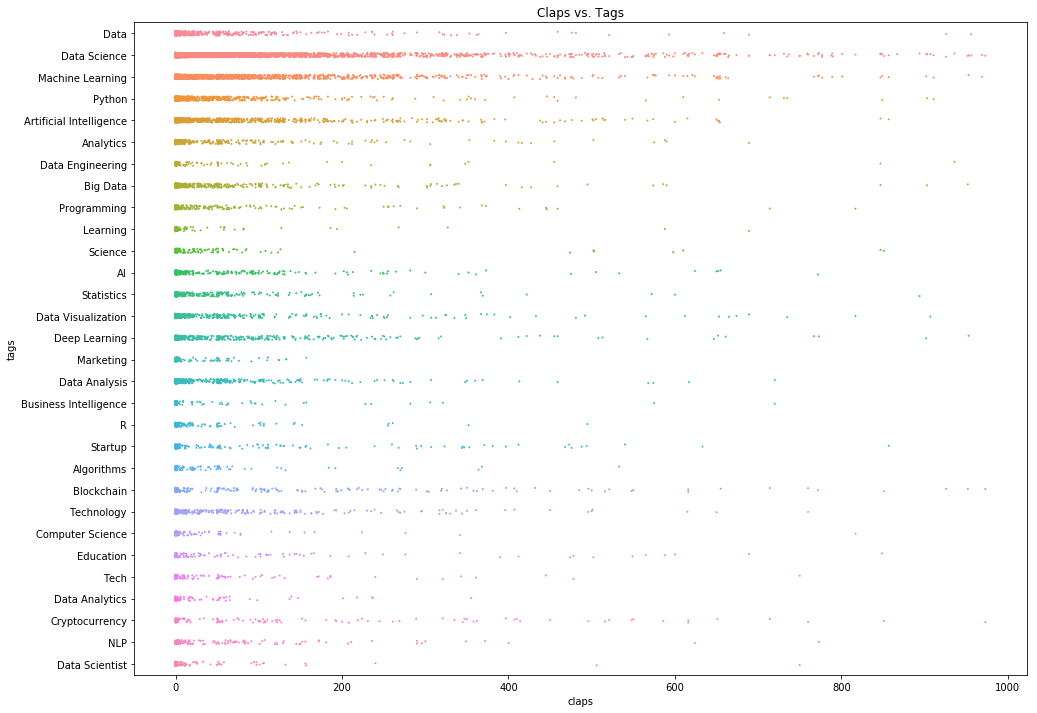

In [23]:
high_vol_tags = df_broadcast.groupby('tags')['tags']\
    .count()\
    .sort_values(ascending=False)[:30]\
    .index.values

high_vol_tags_filter = df_broadcast.tags.isin(high_vol_tags)

data = df_broadcast[high_vol_tags_filter.values]
data = data[data.claps < 1000]
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Claps vs. Tags', fontsize=12)
sns.stripplot(x='claps', y='tags', data=data, ax=ax, jitter=1, marker='.', size=4)

### headings word count

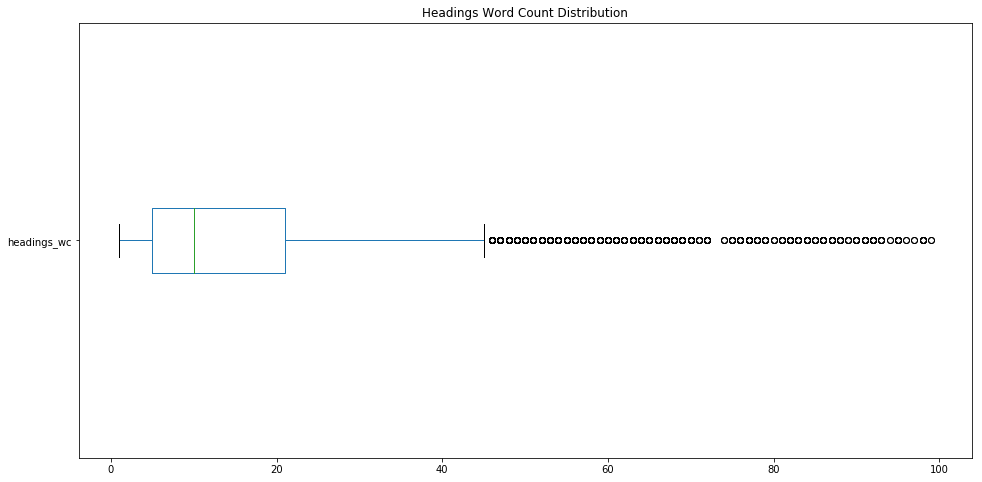

In [24]:
df['headings_wc'] = df.headings.apply(lambda x: len(x.split(' ')))
df[df.headings_wc < 100]['headings_wc'].plot(
    kind='box',
    figsize=(16, 8),
    title='Headings Word Count Distribution',
    vert=False
)

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


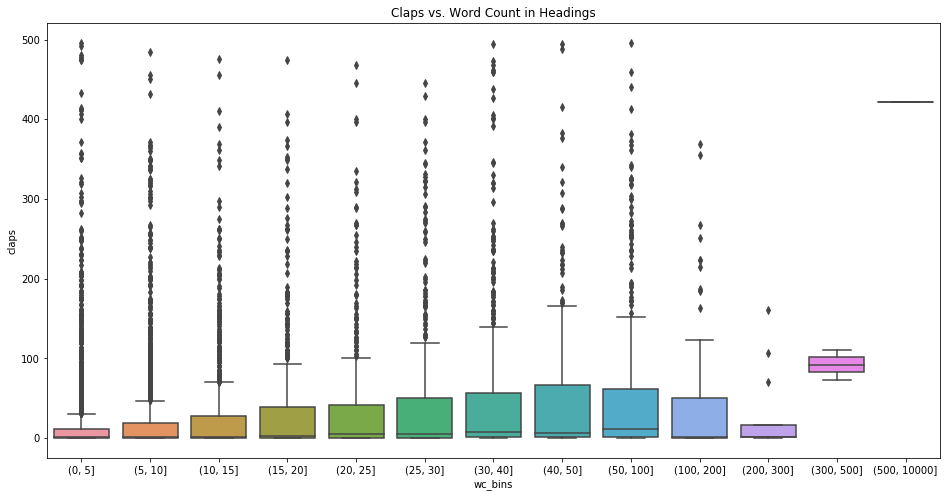

In [25]:
data = df[df.claps < 500]
data['wc_bins'] = pd.cut(data.headings_wc, bins=[0, 5, 10, 15, 20, 25, 30, 40, 50, 100, 200, 300, 500, 10000])
f, ax = plt.subplots(figsize=(16, 8))
ax.set_title('Claps vs. Word Count in Headings', fontsize=12)
sns.boxplot(x='wc_bins', y='claps', data=data, ax=ax)

### contents word count

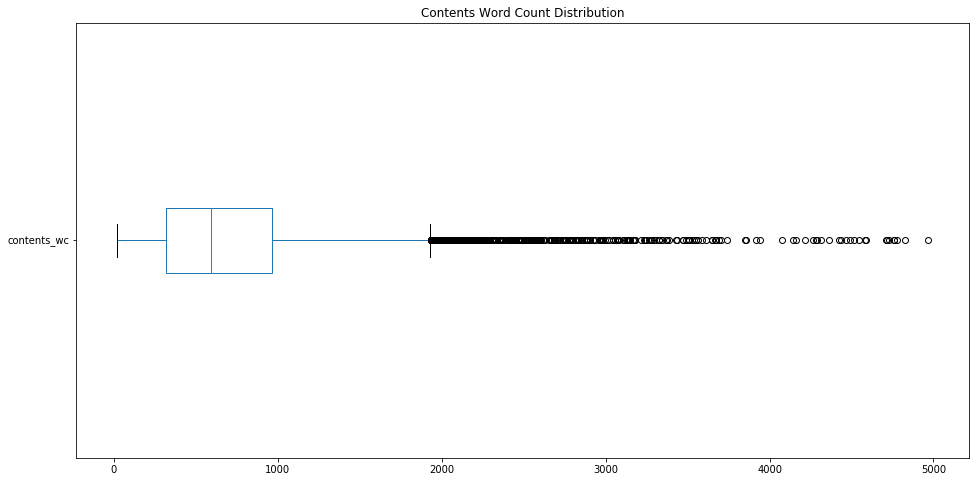

In [26]:
df['contents_wc'] = df.contents.apply(lambda x: len(x.split(' ')))
df[df.contents_wc < 5000]['contents_wc'].plot(
    kind='box',
    figsize=(16, 8),
    title='Contents Word Count Distribution',
    vert=False
)

/Users/Kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


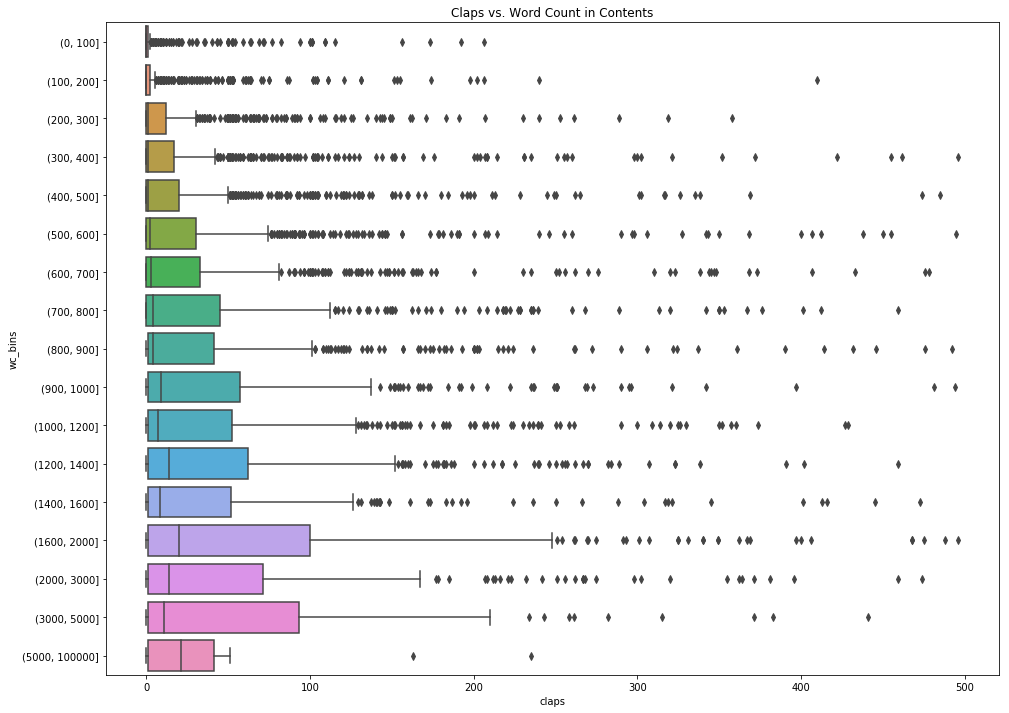

In [27]:
data = df[df.claps < 500]
data['wc_bins'] = pd.cut(
    data.contents_wc, 
    bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 2000, 3000, 5000, 100000])
f, ax = plt.subplots(figsize=(16, 12))
ax.set_title('Claps vs. Word Count in Contents', fontsize=12)
sns.boxplot(x='claps', y='wc_bins', data=data, ax=ax)